# Forecasting

In [1]:
%%html
<style>.dataframe td {white-space: nowrap;}</style>

In [3]:
# !pip install pystan
# !pip install prophet

In [4]:
# import modules
import pandas as pd
import numpy as np

# forecasting
import warnings
warnings.simplefilter('ignore')
from prophet import Prophet

# full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas format
pd.set_option('display.float_format', '{:_.0f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)

# plotting modules
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 20  # no scientific notation in graphs
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 10   # pad is in points... default is 6
import seaborn as sns
sns.set_theme()

### Import and Prepare Data

In [5]:
import rv_functions as rv

# rename imported data to remove rv prefix
try:
    GSCAT, GSDET, GSINF, MISSIONS, SPECIES, df = rv.GSCAT, rv.GSDET, rv.GSINF, rv.MISSIONS, rv.SPECIES, rv.df
    del rv.GSCAT, rv.GSDET, rv.GSINF, rv.MISSIONS, rv.SPECIES, rv.df
except:
    print('This step was already completed')

In [40]:
# import data data
df_cod = rv.filter_by_species(df, 10)

# reduce to y and ds columns
df_cod = df_cod[['TOTNO', 'DATETIME']].drop_duplicates()
df_cod.columns = ['y', 'ds']

# sum totals by year
df_cod = df_cod.groupby(df_cod['ds'].dt.year).sum().reset_index()
df_cod['ds'] = pd.to_datetime(df_cod['ds'].astype(str) + '-01-01')

# same stuff for lobster
df_lobster = rv.filter_by_species(df, 2550)
df_lobster = df_lobster[['TOTNO', 'DATETIME']].drop_duplicates()
df_lobster.columns = ['y', 'ds']
df_lobster = df_lobster.groupby(df_lobster['ds'].dt.year).sum().reset_index()
df_lobster['ds'] = pd.to_datetime(df_lobster['ds'].astype(str) + '-01-01')

### Forecasting Using Profit

Either I'm doing this completely wrong (likely), or this doesn't work at all
What is going wrong?

In [81]:
m_cod = Prophet(interval_width=0.95, daily_seasonality=False)
m_cod.fit(df_cod)

m_lobster = Prophet(interval_width=0.95, daily_seasonality=False)
m_lobster.fit(df_lobster)

08:51:47 - cmdstanpy - INFO - Chain [1] start processing
08:51:47 - cmdstanpy - INFO - Chain [1] done processing
08:51:47 - cmdstanpy - INFO - Chain [1] start processing
08:51:47 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
future_cod = m_cod.make_future_dataframe(periods=20, freq='Y')
future_lobster = m_lobster.make_future_dataframe(periods=20, freq='Y')

In [85]:
forecast_cod = m_cod.predict(future_cod)
forecast_lobster = m_lobster.predict(future_lobster)

### Plot Forecasts

In [ ]:
# https://www.youtube.com/watch?v=KvLG1uTC-KU&list=WL&index=4&ab_channel=NicholasRenotte
# https://facebook.github.io/prophet/docs/quick_start.html

In [97]:
df_cod.head()
# why are none of the y values in the predictions even close the the known values?

,ds,y
0,1970-01-01,2086
1,1971-01-01,2058
2,1972-01-01,2034
3,1973-01-01,5869
4,1974-01-01,3128


In [98]:
forecast_cod.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,-1_575,-147,18_623,-1_575,-1_575,11_101,11_101,11_101,11_101,11_101,11_101,0,0,0,9_525
1,1971-01-01,-1_688,-1_334,18_800,-1_688,-1_688,10_720,10_720,10_720,10_720,10_720,10_720,0,0,0,9_032
2,1972-01-01,-1_801,-1_794,18_611,-1_801,-1_801,10_295,10_295,10_295,10_295,10_295,10_295,0,0,0,8_494
3,1973-01-01,-1_915,-890,19_629,-1_915,-1_915,11_436,11_436,11_436,11_436,11_436,11_436,0,0,0,9_521
4,1974-01-01,-2_028,-1_981,20_188,-2_028,-2_028,11_101,11_101,11_101,11_101,11_101,11_101,0,0,0,9_073


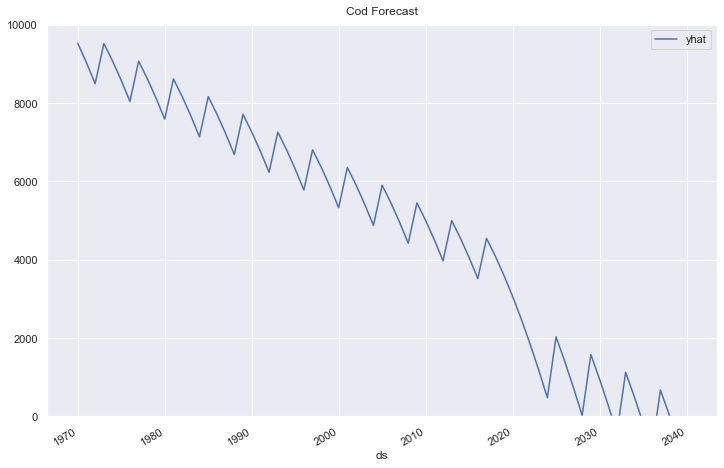

In [95]:
forecast_cod[['ds', 'yhat']].plot(x='ds', figsize=(12,8), title='Cod Forecast', ylim=(0,10_000));

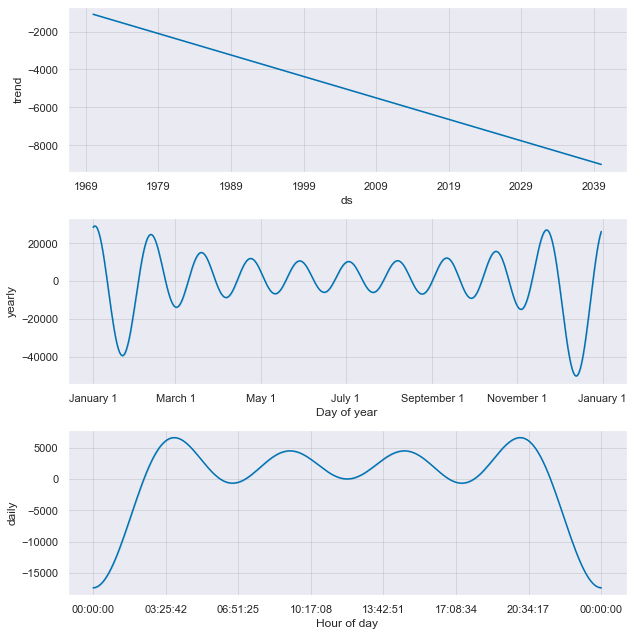

In [54]:
plot_cod = m_cod.plot_components(forecast_cod)

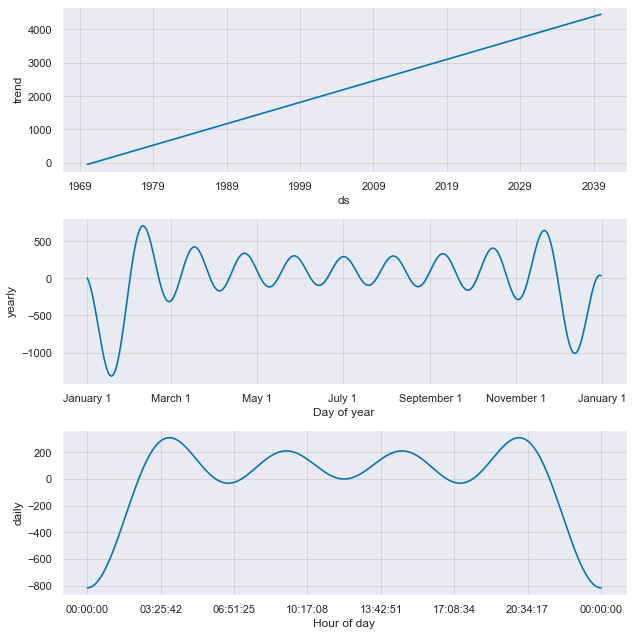

In [55]:
plot_lobster = m_lobster.plot_components(forecast_lobster)

ValueError: values must be a 1D array

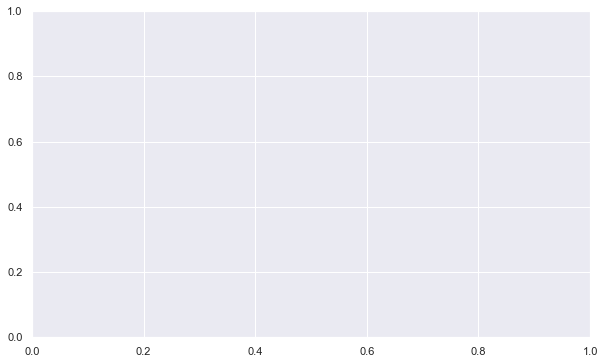

In [61]:
# https://facebook.github.io/prophet/docs/quick_start.html#python-api
fig_cod = m_cod.plot(forecast_cod)